## 10-Unsupervised-Learning - Day 2 - Preprocessing, PCA

### Class Objectives

* Explain the importance of preprocessing data for unsupervised learning
* Update categorical variables using `git_dummies` and custom encoding functions
* Normalize data using StandardScaler
* Reduce dimensionality with PCA
* Describe the pros and cons of using PCA
* Incorporate PCA with the elbow method and K-means

### Definitions
- **Principal Component Analysis (PCA)** is a statistical technique that is used to streamline the machine learning process when too many factors exist in the data. What is too many could be 5, like we just experienced, or 10, 100 or even 1000, depending on the dataset.

# ================================

### 2.01 Instructor Do: Preprocessing Data (20 min)

In [1]:
# Import the moduels
import pandas as pd
from pathlib import Path
import hvplot.pandas

* Import the Pandas DataFrame

In [2]:
# Read in the CSV file as a Pandas Dataframe
ccinfo_df = pd.read_csv(
    Path("01-Ins_Preprocessing/Resources/cc_info_default.csv")
)

In [3]:
# Review the DataFrame
ccinfo_df.tail()

,limit_bal,education,marriage,age,bill_amt,pay_amt,default
4994,20000,secondary,yes,36,110994,7293,0
4995,180000,other,yes,34,35240,22066,0
4996,200000,secondary,yes,45,691806,21443,1
4997,310000,post-grad,yes,44,1548067,72000,0
4998,160000,primary,no,40,4440,3725,0


In [4]:
# Review the info
ccinfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   limit_bal  4999 non-null   int64 
 1   education  4999 non-null   object
 2   marriage   4999 non-null   object
 3   age        4999 non-null   int64 
 4   bill_amt   4999 non-null   int64 
 5   pay_amt    4999 non-null   int64 
 6   default    4999 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 273.5+ KB


* Transform "education" column with get_dummies

In [5]:
ccinfo_df["education"].value_counts()

secondary    2267
primary      1862
post-grad     822
other          48
Name: education, dtype: int64

In [6]:
# Transform the education column using get_dummies
education_dummies = pd.get_dummies(ccinfo_df["education"])

# Display the transformed data
education_dummies.tail()

,other,post-grad,primary,secondary
4994,0,0,0,1
4995,1,0,0,0
4996,0,0,0,1
4997,0,1,0,0
4998,0,0,1,0


In [7]:
# Concatenate the df_shopping_transformed and the card_dummies DataFrames
ccinfo_df = pd.concat([ccinfo_df, education_dummies], axis=1)

# Drop the original education column
ccinfo_df = ccinfo_df.drop(columns=["education"])

# Display the DataFrame
ccinfo_df.head()

,limit_bal,marriage,age,bill_amt,pay_amt,default,other,post-grad,primary,secondary
0,20000,yes,24,7704,689,1,0,0,0,1
1,120000,no,26,17077,5000,1,0,0,0,1
2,90000,no,34,101653,11018,0,0,0,0,1
3,50000,yes,37,231334,8388,0,0,0,0,1
4,50000,yes,57,109339,59049,0,0,0,0,1


* Transform "marriage" column with encoding function

In [8]:
# Encoding the marriage column using a custom function
def encode_marriage(marriage):
    """
    This function encodes marital status by setting yes as 1 and no as 0.
    """
    if marriage == "yes":
        return 1
    else:
        return 0

# Call the encode_marriage function on the marriage column
ccinfo_df["marriage"] = ccinfo_df["marriage"].apply(encode_marriage)

# Review the DataFrame 
ccinfo_df.head()

,limit_bal,marriage,age,bill_amt,pay_amt,default,other,post-grad,primary,secondary
0,20000,1,24,7704,689,1,0,0,0,1
1,120000,0,26,17077,5000,1,0,0,0,1
2,90000,0,34,101653,11018,0,0,0,0,1
3,50000,1,37,231334,8388,0,0,0,0,1
4,50000,1,57,109339,59049,0,0,0,0,1


* Apply the Standard Scaler to "limit_bal", "bill_amt", "pay_amt"

In [9]:
# Import the module
from sklearn.preprocessing import StandardScaler

In [10]:
# Scaling the numeric columns
ccinfo_data_scaled = StandardScaler().fit_transform(ccinfo_df[["limit_bal", "bill_amt", "pay_amt"]])

# Review the scaled data
ccinfo_data_scaled

array([[-1.1173411 , -0.66070266, -0.5427793 ],
       [-0.3499424 , -0.63637003, -0.46399421],
       [-0.58016201, -0.41680786, -0.35401308],
       ...,
       [ 0.26397655,  1.1152494 , -0.16349243],
       [ 1.10811512,  3.33813208,  0.76045505],
       [-0.04298292, -0.66917611, -0.4872953 ]])

In [11]:
# Create a DataFrame of the scaled data
ccinfo_data_scaled = pd.DataFrame(ccinfo_data_scaled, columns=["limit_bal", "bill_amt", "pay_amt"])

# Replace the original data with the columns of information from the scaled Data
ccinfo_df["limit_bal"] = ccinfo_data_scaled["limit_bal"]
ccinfo_df["bill_amt"] = ccinfo_data_scaled["bill_amt"]
ccinfo_df["pay_amt"] = ccinfo_data_scaled["pay_amt"]

# Review the DataFrame
ccinfo_df.head()

,limit_bal,marriage,age,bill_amt,pay_amt,default,other,post-grad,primary,secondary
0,-1.117341,1,24,-0.660703,-0.542779,1,0,0,0,1
1,-0.349942,0,26,-0.636370,-0.463994,1,0,0,0,1
2,-0.580162,0,34,-0.416808,-0.354013,0,0,0,0,1
3,-0.887121,1,37,-0.080152,-0.402077,0,0,0,0,1
4,-0.887121,1,57,-0.396855,0.523771,0,0,0,0,1


* Elbow Method to find k

In [12]:
# Import the KMeans module from SKLearn
from sklearn.cluster import KMeans

In [13]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

In [14]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(ccinfo_df)
    inertia.append(k_model.inertia_)
    

In [15]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,449413.376075
1,2,152036.470987
2,3,83362.744848
3,4,58548.383261
4,5,45451.282971


In [16]:
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

* Kmeans algo to segemnt data

In [17]:
# Define the model with 3 clusters
model = KMeans(n_clusters=3, random_state=1)

# Fit the model
model.fit(ccinfo_df)

# Make predictions
k_3 = model.predict(ccinfo_df)

# Add a class column with the labels
ccinfo_df['customer_segments'] = k_3

In [18]:
# Plot the clusters
ccinfo_df.hvplot.scatter(
    x="limit_bal",
    y="bill_amt",
    by="customer_segments"
)

:NdOverlay   [customer_segments]
   :Scatter   [limit_bal]   (bill_amt)

# ================================

### 2.02 Student Do: Data Preprocessing (25 min)

# Data Preprocessing

In this activity, students will use their knowledge of preprocessing data to prepare a dataset for segmentation using the elbow method and the K-means algorithm.

## Instructions

As part of the data analysis team for a new FinTech startup, you have just been given a customer segmentation task. The dataset consists of customer data, including their age range, current balance in their account, the expenditures they have made since using the service, and whether or not they are currently an official subscriber. Before you can begin the segmentation analysis, however, you must first prepare it for the analysis.

This task will involve 3 parts:

1. Preprocess the data.

2. Use the elbow method to determine the optimal value for k.

3. Segment the data with K-means.

Follow the instructions below to accomplish each part:

* Part 1: Preprocessing the data:

  * Using the [starter code](02-Stu_Data_Preprocessing/Unsolved/data_preprocessing.ipynb) provided, review the code related to the import of the `customers.csv` file from the Resources folder and the creation of the Pandas DataFrame.

  * Write a function to encode the "status" column. When encoded, the column should reflect a 1 for "Subscribed" and a 0 for "Not-Subscribed".

  * Use the Pandas `get_dummies` function to transform the categorical variables associated with the "age" column into numerical variables. Be sure to concatenate the `age_dummies` DataFrame with the `customers_df` DataFrame, and drop the original "age" column from the DataFrame.

  * Use Scikit-learn's `StandardScaler` to normalize the "balance" and "spending" columns. Once the data has been scaled, convert the array into a Pandas DataFrame with columns called "balance" and "spending". Finally, replace the data in the "balance" and "spending" columns in the `customers_df` DataFrame with the scaled data.

* Part 2:  Use the elbow method to determine the optimal value for k.

* Part 3:  Segment the data with K-means.

---

# Data Preprocessing

As part of the data analysis team for a new fintech startup, you have just been given a customer segmentation task. The dataset consists of customer data, including their age range, current balance in their account, the expenditures they have made since using the service, and whether or not they are currently an official subscriber. Before you can begin the segmentation analysis, however, you must first prepare it for the analysis.

This task will involve 3 parts:

* Preprocess the data.

* Use the elbow method to determine the optimal value for k.

* Segment the data with K-means.

In [19]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import hvplot.pandas

### Part 1: Preprocess the data

1. Review the information associated with the import of the customers.csv file and the creation of the Pandas DataFrame

In [20]:
# Read the csv file into a pandas DataFrame
customers_df = pd.read_csv(Path('02-Stu_Data_Preprocessing/Resources/customers.csv'))

# Review the DataFrame
customers_df.head()

,status,age,balance,spending
0,Subscribed,20-46,4512,1530
1,Subscribed,20-46,3738,1297
2,Subscribed,20-46,4261,1335
3,Subscribed,20-46,3777,1282
4,Subscribed,20-46,4177,1590


In [21]:
# Review the DataFrame information
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   status    237 non-null    object
 1   age       237 non-null    object
 2   balance   237 non-null    int64 
 3   spending  237 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 7.5+ KB


In [22]:
# Review the categories associated with the status column
customers_df['status'].value_counts()

Subscribed        134
Not-Subscribed    103
Name: status, dtype: int64

In [23]:
# Review the categories associated with the age column
customers_df['age'].value_counts()

46       127
20-46    110
Name: age, dtype: int64

2. Write a function to encode the "status" column. When encoded, the column should reflect a 1 for "Subscribed" and a 0 for "Not-Subscribed".

In [24]:
# Encoding the marriage column using a custom function
def encode_status(status):
    """
    This function encodes marital status by setting yes as 1 and no as 0.
    """
    if status == "Subscribed":
        return 1
    else:
        return 0
  

In [25]:
customers_df['status'].apply(encode_status)

0      1
1      1
2      1
3      1
4      1
      ..
232    0
233    0
234    0
235    0
236    0
Name: status, Length: 237, dtype: int64

In [26]:
# Call the encode_status function on the status column
customers_df['status'] = customers_df['status'].apply(encode_status)

In [27]:
# Review the DataFrame 
# YOUR CODE HERE
customers_df.tail()

,status,age,balance,spending
232,0,46,3214,1110
233,0,46,3394,1215
234,0,46,3233,1104
235,0,46,3352,1170
236,0,46,3391,1120


3. Use the Pandas `get_dummies` function to transform the categorical variables associated with the "age" column into numerical variables. Be sure to concatenate the `age_dummies` DataFrame with the `customers_df` DataFrame, and drop the original "age" column from the DataFrame.

In [28]:
# Transform the age column using the Pandas get_dummies function
age_dummies = pd.get_dummies(customers_df['age'])

# Display the transformed data
age_dummies.tail(15)

,20-46,46
222,0,1
223,0,1
224,0,1
225,0,1
226,0,1
227,0,1
228,0,1
229,0,1
230,0,1
231,0,1


In [29]:
# Concatenate the customer_df and the age_dummies DataFrames
customers_df_con = pd.concat([customers_df, age_dummies], axis=1)
customers_df_con

,status,age,balance,spending,20-46,46
0,1,20-46,4512,1530,1,0
1,1,20-46,3738,1297,1,0
2,1,20-46,4261,1335,1,0
3,1,20-46,3777,1282,1,0
4,1,20-46,4177,1590,1,0
...,...,...,...,...,...,...
232,0,46,3214,1110,0,1
233,0,46,3394,1215,0,1
234,0,46,3233,1104,0,1
235,0,46,3352,1170,0,1


In [30]:
# Drop the original age column from the DataFrame
customers_df = customers_df.drop(columns=['age'])

In [31]:
# Display the DataFrame
# YOUR CODE HERE
customers_df

,status,balance,spending
0,1,4512,1530
1,1,3738,1297
2,1,4261,1335
3,1,3777,1282
4,1,4177,1590
...,...,...,...
232,0,3214,1110
233,0,3394,1215
234,0,3233,1104
235,0,3352,1170


4. Use SKLearn's `StandardScaler` to normalize the "balance" and "spending" columns. Once the data has been scaled, convert the array into a Pandas DataFrame with column called "balance" and "spending". Finally, replace the data in the "balance" and "spending" columns in the `customers_df` DataFrame with the scaled data. 

In [32]:
# Import the StandardScaler module from SKLearn
# YOUR CODE HERE

from sklearn.preprocessing import StandardScaler

In [33]:
# Scaling the numeric columns
customer_data_scaled = StandardScaler().fit_transform(customers_df[
    ['balance','spending']])

# Review the scaled data
customer_data_scaled[0:5]

array([[ 2.40886829,  2.0579083 ],
       [ 0.28535333,  0.11763692],
       [ 1.72023489,  0.43407603],
       [ 0.39235214, -0.00727325],
       [ 1.4897759 ,  2.557549  ]])

In [34]:
# Create a DataFrame of the scaled data
customer_data_scaled = pd.DataFrame(customer_data_scaled, columns=
                                    ['balance','spending'])

# Replace the original data with the columns of information from the scaled Data
customers_df["balance"] = customer_data_scaled['balance']
customers_df["spending"] = customer_data_scaled['spending']

# Review the DataFrame
customers_df

,status,balance,spending
0,1,2.408868,2.057908
1,1,0.285353,0.117637
2,1,1.720235,0.434076
3,1,0.392352,-0.007273
4,1,1.489776,2.557549
...,...,...,...
232,0,-1.152272,-1.439577
233,0,-0.658431,-0.565205
234,0,-1.100144,-1.489541
235,0,-0.773661,-0.939936


### Part 2: Use the elbow method to determine the optimal value for k

In [35]:
# Import the KMeans module from SKLearn
# YOUR CODE HERE
from sklearn.cluster import KMeans

In [36]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

In [37]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(customers_df)
    inertia.append(k_model.inertia_)

In [38]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,532.236287
1,2,251.962595
2,3,167.072645
3,4,139.694525
4,5,116.272004


In [39]:
# Plot the DataFrame
# YOUR CODE HERE
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

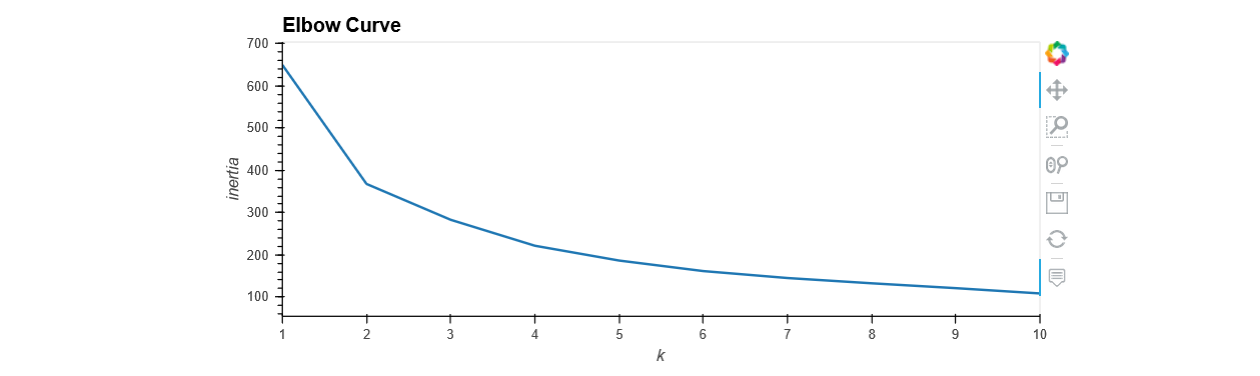

### Part 3: Segment the data with K-means

In [40]:
# Define the model with optimal number of clusters
model = KMeans(n_clusters=3)

# Fit the model
# YOUR CODE HERE
model.fit(customers_df)
# Make predictions
k_3 = model.predict(customers_df)

# Add a class column with the labels
customers_df['customer_segments'] = k_3
customers_df

,status,balance,spending,customer_segments
0,1,2.408868,2.057908,1
1,1,0.285353,0.117637,2
2,1,1.720235,0.434076,1
3,1,0.392352,-0.007273,2
4,1,1.489776,2.557549,1
...,...,...,...,...
232,0,-1.152272,-1.439577,0
233,0,-0.658431,-0.565205,0
234,0,-1.100144,-1.489541,0
235,0,-0.773661,-0.939936,0


In [41]:
# Plot the clusters
# YOUR CODE HERE
customers_df.hvplot.scatter(
    x='balance',
    y='spending',
    by='customer_segments')

:NdOverlay   [customer_segments]
   :Scatter   [balance]   (spending)

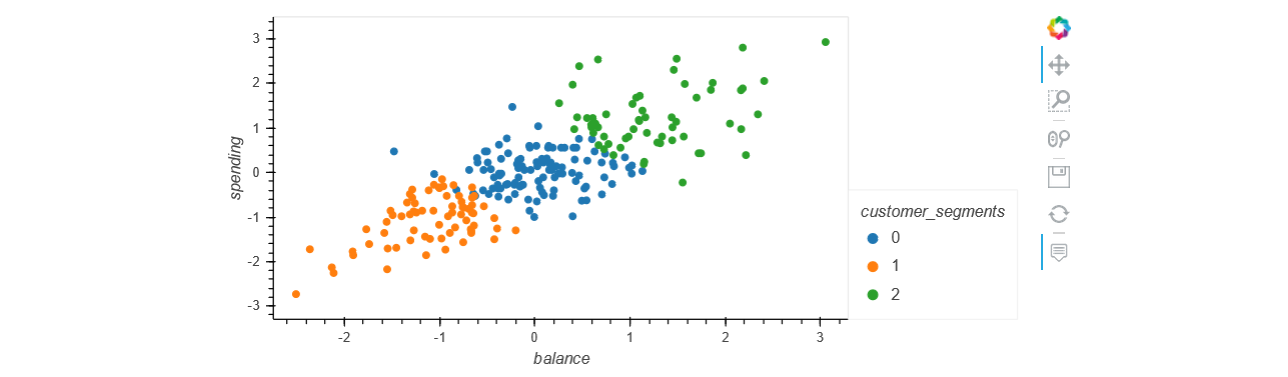

# ================================

### 2.03 Instructor Do: Introducing PCA (15 min)

- **Principal Component Analysis (PCA)** is a statistical technique that is used to streamline the machine learning process when too many factors exist in the data. What is too many could be 5, like we just experienced, or 10, 100 or even 1000, depending on the dataset.

In [42]:
# Import the moduels
import pandas as pd
from pathlib import Path
import hvplot.pandas
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

* Import the Pandas DataFrame

In [43]:
# Read in the CSV file as a Pandas Dataframe
ccinfo_default_df = pd.read_csv(
    Path("03-Ins_PCA/Resources/ccinfo_transformed.csv")
)

ccinfo_default_df.head()

,limit_bal,marriage,age,bill_amt,pay_amt,default,other,post-grad,primary,secondary,customer_segments
0,-1.117341,1,24,-0.660703,-0.542779,1,0,0,0,1,2
1,-0.349942,0,26,-0.636370,-0.463994,1,0,0,0,1,2
2,-0.580162,0,34,-0.416808,-0.354013,0,0,0,0,1,0
3,-0.887121,1,37,-0.080152,-0.402077,0,0,0,0,1,0
4,-0.887121,1,57,-0.396855,0.523771,0,0,0,0,1,1


* Use PCA to reduce the number of factors 

In [44]:
# Import the PCA module
from sklearn.decomposition import PCA

In [45]:
# Instantiate the PCA instance
# Declare the number of PCA variables
pca=PCA(n_components=2)

In [46]:
# Fit the PCA model on the transformed credit card DataFrame
ccinfo_pca = pca.fit_transform(ccinfo_default_df)

# Review the first 5 rows of list data
ccinfo_pca[:5]

array([[-11.4106317 ,  -1.19426208],
       [ -9.424725  ,  -0.75732157],
       [ -1.33620686,  -0.69534399],
       [  1.67884463,  -0.76676318],
       [ 21.58943237,  -0.9373152 ]])

* PCA explained variance ratio

In [47]:
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_

array([0.95017303, 0.01898131])

* Creating the PCA DataFrame

In [48]:
# Create the PCA DataFrame
ccinfo_pca_df = pd.DataFrame(
    ccinfo_pca,
    columns=["PCA1", "PCA2"]
)

# Review the PCA DataFrame
ccinfo_pca_df.head()

,PCA1,PCA2
0,-11.410632,-1.194262
1,-9.424725,-0.757322
2,-1.336207,-0.695344
3,1.678845,-0.766763
4,21.589432,-0.937315


* Incorporating the PCA DataFrame into the elbow method

In [49]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

# Append the value of the computed inertia from the `inertia_` attribute of teh KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(ccinfo_pca_df)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,439527.527904
1,2,141348.205462
2,3,71950.112226
3,4,47104.159733
4,5,34598.959866


In [50]:
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

* Segmention of the PCA data with Kmeans

In [51]:
# Define the model with 3 clusters
model = KMeans(n_clusters=3, random_state=1)

# Fit the model
model.fit(ccinfo_pca_df)

# Make predictions
k_3 = model.predict(ccinfo_pca_df)

# Add a class column with the labels
ccinfo_pca_df['customer_segments'] = k_3

In [52]:
# Plot the clusters
ccinfo_pca_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="customer_segments"
)

:NdOverlay   [customer_segments]
   :Scatter   [PCA1]   (PCA2)

# ================================

### 2.04 Student Do: Segmenting with PCA (20 min)

# Segmenting with PCA

In this activity, you will use your knowledge of PCA to reduce the dimensionality of the the transformed customers DataFrame, and then compare that result to the segmentation of the data using all of the factors.

## Instructions

The PCA technique for dimensional reduction has just come to your attention. At this point, you have already segmented the data based on all of the factors, but are wondering if PCA would alter the segmentation results.

Using the [starter code](04-Stu_Segmenting_with_PCA/Unsolved/segmenting_with_pca.ipynb) and the customer data that has been preprocessed (transformed), reduce the factors to only 2 dimensions using PCA, determine the optimal value for k using the PCA DataFrame, and then segment the data using the K-Means algorithm and the optimal value for k. Once these steps are complete, segment the preprocessed customer DataFrame using the K-means algorithm and that same value for k, and then compare the segmentation results.

This task will involve 5 parts:

1. Use PCA to reduce the dimensionality of the `customers_transformed_df` DataFrame to 2 principal components.

2. Using the `customers_pca_df` DataFrame, utilize the elbow method to determine the optimal value of k.

3. Segment the `customers_pca_df` DataFrame using the K-means algorithm and the optimal value for k defined in Part 2.

4. Segment the `customers_transformed_df` DataFrame with all factors using the K-means algorithm.

5. Compare the segmentation results between the PCA DataFrame and the full-factored DataFrame.

Follow the instructions below to accomplish each part:

* Part 1: Use PCA to reduce the dimensionality of the transformed customers DataFrame to 2 principal components.

  * Import the PCA module from SKLearn.

  * Instantiate the instance of the PCA model declaring the number of principal components as 2.

  * Using the `fit_transform` function from PCA, fit the PCA model to the `customers_transformed_df` DataFrame. Review the first 5 rows of list data.

  * Using the `explained_variance_ratio_` function from PCA, calculate the percentage of the total variance that is captured by the two PCA variables.  What is the explained variance ratio captured by the two PCA variables?

  * Using the `customer_pca` data, create a Pandas DataFrame called `customers_pca_df`. The columns of the DataFrame should be called "PCA1" and "PCA2".

* Part 2: Using the `customers_pca_df` DataFrame, utilize the elbow method to determine the optimal value of k.

* Part 3: Segment the `customers_pca_df` DataFrame using the K-means algorithm and the optimal value for k defined in Part 2.

* Part 4: Segment the `customers_transformed_df` DataFrame with all factors using the K-means algorithm.

* Part 5: Compare the segmentation results between the PCA DataFrame and the full-factored DataFrame.

---

# Segmenting with PCA

In this activity, students will use their knowledge of PCA to reduce the dimensionality of the transformed customers DataFrame, and then compare that result to the segmentation of the data using all of the factors.

In [53]:
# Import the modules
import pandas as pd
from pathlib import Path
import hvplot.pandas
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

* Read in the CSV file and prepare the Pandas DataFrame

In [54]:
# Read the csv file into a pandas DataFrame
customers_transformed_df = pd.read_csv(
    Path("04-Stu_Segmenting_with_PCA/Resources/customers_transformed.csv")
)

# Review the DataFrame
customers_transformed_df.head()

,status,balance,spending,20-46,46,customer_segments
0,1,2.408868,2.057908,1,0,2
1,1,0.285353,0.117637,1,0,0
2,1,1.720235,0.434076,1,0,2
3,1,0.392352,-0.007273,1,0,0
4,1,1.489776,2.557549,1,0,2


### Part 1: Use PCA to reduce the dimensionality of the transformed customers DataFrame to 2 principal components

1. Import the PCA module from SKLearn

In [55]:
# Import the PCA module
# YOUR CODE HERE
from sklearn.decomposition import PCA


2. Instantiate the instace of the PCA model declaring the number of principal components as 2

In [56]:
# Instantiate the PCA instance
# Declare the number of PCA variables
pca = PCA(n_components=2)


3. Using the `fit_transform` function from PCA, fit the PCA model to the `customers_transformed_df` DataFrame. Review the first 5 rows of list data.

In [57]:
# Fit the PCA model on the transformed credit card DataFrame
customers_pca = pca.fit_transform(customers_transformed_df)

# Review the first 5 rows of the array of list data
# YOUR CODE HERE
customers_pca[0:5]

array([[ 3.44389347,  0.13565331],
       [ 0.17190015,  1.11405768],
       [ 1.91877094, -0.22142886],
       [ 0.16021508,  1.10235405],
       [ 3.16635174,  0.1340729 ]])

4. Using the `explained_variance_ratio_` function from PCA, calculate the percentage of the total variance that is captured by the two PCA variables.

In [58]:
# Calculate the PCA explained variance ratio
# YOUR CODE HERE
pca.explained_variance_ratio_

array([0.59109262, 0.16943645])

**Question:** What is the explained variance ratio captured by the two PCA variables?
    
**Answer:** # YOUR ANSWER HERE

5. Using the `customer_pca` data, create a Pandas DataFrame called `customers_pca_df`. The columns of the DataFrame should be called "PCA1" and "PCA2".

In [59]:
# Create the PCA DataFrame
customers_pca_df = pd.DataFrame(customers_pca, columns=['PCA1', 'PCA2'])

# Review the PCA DataFrame
# YOUR CODE HERE
customers_pca_df.head()

,PCA1,PCA2
0,3.443893,0.135653
1,0.171900,1.114058
2,1.918771,-0.221429
3,0.160215,1.102354
4,3.166352,0.134073


### Part 2: Using the `customers_pca_df` Dataframe, utilize the elbow method to determine the optimal value of k.

In [60]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

In [61]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(customers_pca_df)
    inertia.append(k_model.inertia_)
    

In [62]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,613.743753
1,2,255.470402
2,3,121.479507
3,4,95.598975
4,5,73.384068


In [65]:
# Plot the DataFrame
# YOUR CODE HERE
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

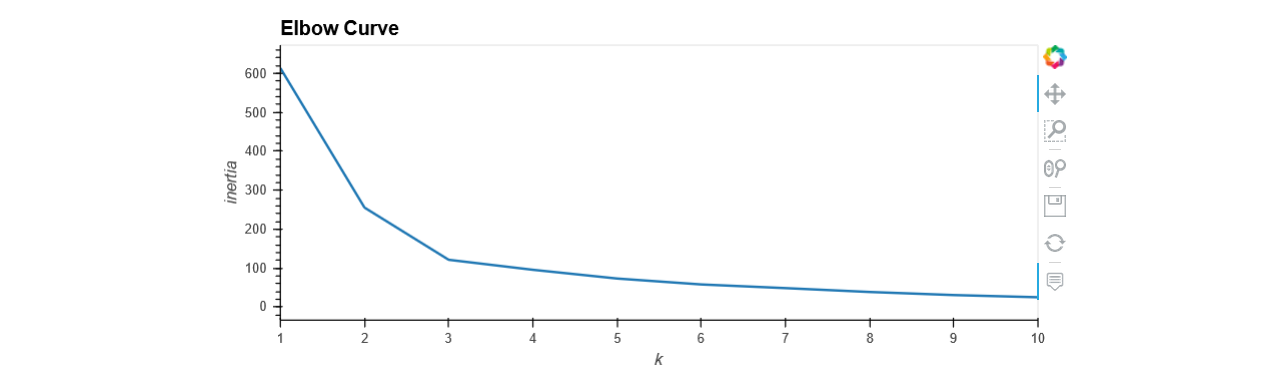

### Part 3: Segment the `customers_pca_df` DataFrame using the K-means algorithm.

In [68]:
# Define the model Kmeans model using the optimal value of k for the number of clusters.
model = KMeans(n_clusters=3, random_state=0)

# Fit the model

model.fit(customers_pca_df)

# Make predictions
k_3 =  model.predict(customers_pca_df)

# Add a class column with the labels
customers_pca_df["customer_segments"] = k_3

In [69]:
# Plot the clusters
customers_pca_df.hvplot.scatter(
    x="PCA2",
    y="PCA1",
    by="customer_segments"
)

:NdOverlay   [customer_segments]
   :Scatter   [PCA2]   (PCA1)

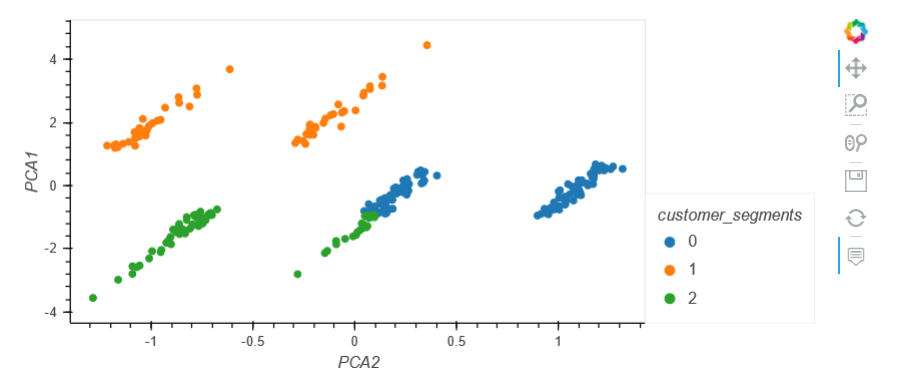

### Part 4: Segment the `customers_transformed_df` DataFrame with all factors using the K-means algorithm

In [70]:
# Define the model Kmeans model using the optimal value of k for the number of clusters.
model = KMeans(n_clusters=3, random_state=0)

# Fit the model

model.fit(customers_transformed_df)

# Make predictions
k_3 =  model.predict(customers_transformed_df)

# Add a class column with the labels
customers_transformed_df["customer_segments"] = k_3

In [72]:
# Plot the clusters
# YOUR CODE HERE
# Plot the clusters
customers_transformed_df.hvplot.scatter(
    x="balance",
    y="spending",
    by="customer_segments"
)

:NdOverlay   [customer_segments]
   :Scatter   [balance]   (spending)


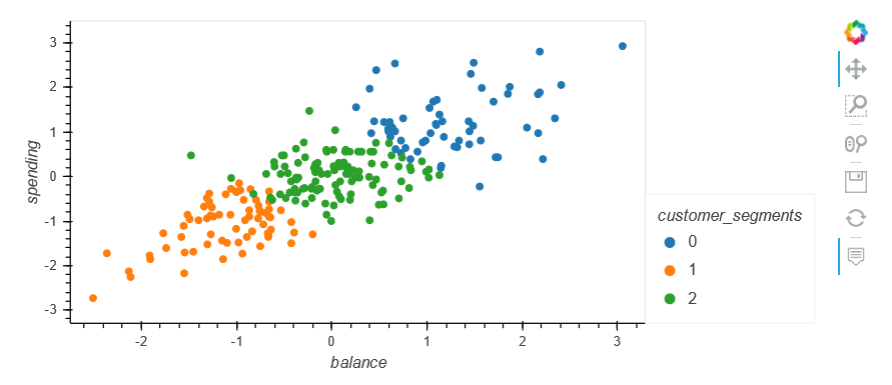

### Part 5: Compare the segmentation results between the PCA DataFrame and the full-factored DataFrame

**Answer:** # YOUR ANSWER HERE

# ================================

### Rating Class Objectives

* rate your understanding using 1-5 method in each objective

In [73]:
title = "10-Unsupervised-Learning - Day 2 - Preprocessing, PCA"
objectives = [
    "Explain the importance of preprocessing data for unsupervised learning",
    "Update categorical variables using git_dummies and custom encoding functions",
    "Normalize data using StandardScaler",
    "Reduce dimensionality with PCA",
    "Describe the pros and cons of using PCA",
    "Incorporate PCA with the elbow method and K-means",
]
rating = []
total = 0
for i in range(len(objectives)):
    rate = input(objectives[i]+"? ")
    total += int(rate)
    rating.append(objectives[i] + ". (" + rate + "/5)")
print("="*96)
print(f"Self Evaluation for: {title}")
print("-"*24)
for i in rating:
    print(i)
print("-"*64)
print("Average: " + str(total/len(objectives)))

Explain the importance of preprocessing data for unsupervised learning?  4
Update categorical variables using git_dummies and custom encoding functions?  4
Normalize data using StandardScaler?  3
Reduce dimensionality with PCA?  3
Describe the pros and cons of using PCA?  4
Incorporate PCA with the elbow method and K-means?  3


Self Evaluation for: 10-Unsupervised-Learning - Day 2 - Preprocessing, PCA
------------------------
Explain the importance of preprocessing data for unsupervised learning. (4/5)
Update categorical variables using git_dummies and custom encoding functions. (4/5)
Normalize data using StandardScaler. (3/5)
Reduce dimensionality with PCA. (3/5)
Describe the pros and cons of using PCA. (4/5)
Incorporate PCA with the elbow method and K-means. (3/5)
----------------------------------------------------------------
Average: 3.5
